**LOGISTIC REGRESSION**

**Q1.**
**Problem Statement : Predicting Student Admission to a Professional Course**


**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score


**DATA COLLECTION (GENERATING THE SYNTHETIC DATA)**

In [ ]:
np.random.seed(123)
data = {
 'High School Percentage': np.random.randint(40, 101, 500),
 'Entrance Exam Score': np.random.randint(40, 101, 500),
 'Letters of Recommendation': np.random.randint(0, 6, 500),
 'Extra-Curricular Activities Score': np.random.randint(0, 11,
500),
 'Admission': np.random.randint(0, 2, 500)
}
df = pd.DataFrame(data)
df.to_csv('synthetic_data.csv', index=False)
data = pd.read_csv('synthetic_data.csv')
data

,High School Percentage,Entrance Exam Score,Letters of Recommendation,Extra-Curricular Activities Score,Admission
0,85,47,3,9,0
1,42,53,1,8,1
2,68,96,0,4,1
3,74,64,1,10,0
4,78,71,1,3,1
...,...,...,...,...,...
495,99,84,0,2,0
496,60,64,2,6,1
497,71,73,2,8,0
498,46,84,5,7,0


**UNDERSTAND THE DATA**

In [ ]:
data.shape
(500, 5)
data.describe()


,High School Percentage,Entrance Exam Score,Letters of Recommendation,Extra-Curricular Activities Score,Admission
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,69.872000,70.240000,2.412000,5.054000,0.502000
std,17.584027,17.081861,1.711173,3.190524,0.500497
min,40.000000,40.000000,0.000000,0.000000,0.000000
25%,55.000000,56.750000,1.000000,2.000000,0.000000
50%,70.000000,70.000000,2.000000,5.000000,1.000000
75%,85.000000,85.000000,4.000000,8.000000,1.000000
max,100.000000,100.000000,5.000000,10.000000,1.000000


**DATA PREPROCESSING**

In [ ]:
data.isnull().sum()

High School Percentage               0
Entrance Exam Score                  0
Letters of Recommendation            0
Extra-Curricular Activities Score    0
Admission                            0
dtype: int64

In [ ]:
data.isnull().any()


High School Percentage               False
Entrance Exam Score                  False
Letters of Recommendation            False
Extra-Curricular Activities Score    False
Admission                            False
dtype: bool

**NO MISSING VALUE FOUND**

**MODEL BUILDING**

**SPLITTING DATA INTO FEATURES AND TARGET**

In [ ]:
X = data.drop('Admission', axis=1)
y = data['Admission']


**SPLITTING DATA INTO TRAIN AND TEST SETS**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

**PLOTTING A HEATMAP**

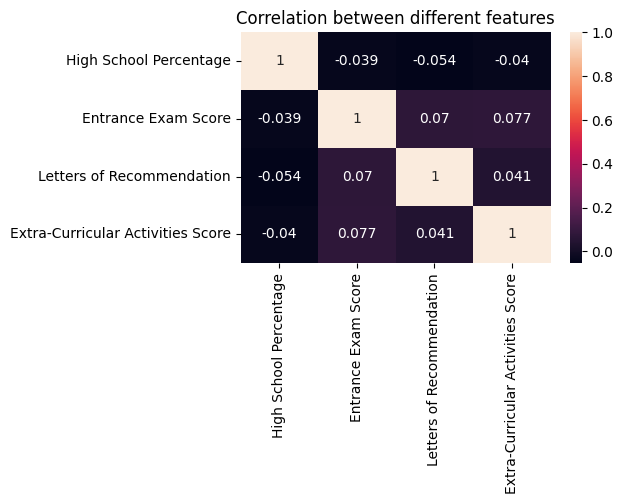

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(X.corr(),annot=True)
plt.title("Correlation between different features")
plt.show()

**TESTING THE DATA**

In [ ]:
print(X_test)

     High School Percentage  Entrance Exam Score  Letters of Recommendation  \
361                      44                   87                          4   
73                       85                   48                          2   
374                      78                   88                          3   
155                      75                   50                          2   
104                      67                   92                          5   
..                      ...                  ...                        ...   
347                      56                   86                          3   
86                       98                   47                          0   
75                       66                   58                          5   
438                      54                   83                          4   
15                       49                   96                          5   

     Extra-Curricular Activities Score  
361       

**MAKING PREDICTIONS**

In [ ]:
y_pred = model.predict(X_test)


**COMPARING ACTUAL AND PREDICTED DATA**

In [ ]:
actual_predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
actual_predicted

,Actual,Predicted
361,1,0
73,1,1
374,1,0
155,1,1
104,0,0
...,...,...
347,1,0
86,0,1
75,0,0
438,0,0


**MODEL EVALUATION**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall:{recall:.2f}")

coefficients = pd.DataFrame({
 'Feature': X.columns,
 'Coefficient': model.coef_[0]
})
print(coefficients)

Accuracy: 0.43, Precision: 0.52, Recall:0.24
                             Feature  Coefficient
0             High School Percentage     0.005059
1                Entrance Exam Score    -0.009649
2          Letters of Recommendation    -0.034892
3  Extra-Curricular Activities Score     0.003789


**INTERPRETATION**

HIGH SCHOOL PERCENTAGE : A small negative coefficient indicates a marginal
decrease in
the log-odds of admission with a unit increase in high school percentage. This might suggest
a minimal negative impact, but the effect is very subtle.

ENTERANCE EXAM SCORE : A positive coefficient indicates that as the entrance exam score
increases by 1 unit, there is a slight increase in the log-odds of admission.

LETTERS OF RECOMMENDATION : A larger negative coefficient suggests that stronger
recommendations have a notable negative impact on the log-odds of admission, potentially
reducing the likelihood of admission.

EXTRA-CURRICULAR ACTIVITIES SCORE : Similar to recommendations, a negative coefficient
implies that more involvement in extracurricular activities is associated with a decrease in the
log-odds of admission.





**Q2.**
**Problem Statement: Predicting Loan Approval for Bank Customers**



**DATA COLLECTION (GENERATING THE SYNTHETIC DATA)**


In [ ]:
np.random.seed(52)
Data = {
 'MonthlyIncome': np.random.normal(5000, 2000, 1000),
 'Age': np.random.randint(21, 70, 1000),
 'CreditScore': np.random.randint(300, 850, 1000),
 'LoanAmount': np.random.normal(50000, 15000, 1000),
 'LoanTermMonths': np.random.randint(12, 60, 1000),
 'EmploymentStatus': np.random.choice(['Employed', 'Unemployed',
'Self-Employed'], 1000),
 'MaritalStatus': np.random.choice(['Single', 'Married',
'Divorced'], 1000),
 'Dependents': np.random.randint(0, 5, 1000),
 'LoanApproved': np.random.randint(0, 2, 1000)
}
df = pd.DataFrame(Data)
df.to_csv('synthetic_loan_dataset.csv', index=False)
Data = pd.read_csv('synthetic_loan_dataset.csv')
Data

,MonthlyIncome,Age,CreditScore,LoanAmount,LoanTermMonths,EmploymentStatus,MaritalStatus,Dependents,LoanApproved
0,6038.951681,45,396,38228.345746,51,Employed,Single,3,0
1,2462.499238,54,362,52491.703926,18,Employed,Single,1,0
2,5480.840052,39,375,40345.398517,44,Unemployed,Single,4,1
3,3392.085136,29,756,27387.381627,48,Employed,Married,3,1
4,5034.688199,52,579,70824.120133,39,Self-Employed,Married,0,1
...,...,...,...,...,...,...,...,...,...
995,5078.629751,39,726,10916.332764,34,Self-Employed,Divorced,3,1
996,7228.075042,41,439,31638.360841,17,Employed,Single,2,1
997,4697.229619,34,581,74170.306973,36,Unemployed,Married,0,1
998,5572.650743,47,414,38791.241545,48,Employed,Married,2,0


In [ ]:
Data.head()

,MonthlyIncome,Age,CreditScore,LoanAmount,LoanTermMonths,EmploymentStatus,MaritalStatus,Dependents,LoanApproved
0,6038.951681,45,396,38228.345746,51,Employed,Single,3,0
1,2462.499238,54,362,52491.703926,18,Employed,Single,1,0
2,5480.840052,39,375,40345.398517,44,Unemployed,Single,4,1
3,3392.085136,29,756,27387.381627,48,Employed,Married,3,1
4,5034.688199,52,579,70824.120133,39,Self-Employed,Married,0,1


**UNDERSTAND THE DATA**

In [ ]:
Data.shape

(1000, 9)

In [ ]:
Data.describe()


,MonthlyIncome,Age,CreditScore,LoanAmount,LoanTermMonths,Dependents,LoanApproved
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4988.203571,45.073000,576.877000,49341.634295,35.845000,2.074000,0.485000
std,1974.628902,14.349062,160.832942,14757.075461,13.884659,1.421459,0.500025
min,-1447.677470,21.000000,300.000000,2861.256059,12.000000,0.000000,0.000000
25%,3612.328344,33.000000,439.750000,39141.077708,24.000000,1.000000,0.000000
50%,5026.586370,45.000000,567.000000,49685.369184,35.000000,2.000000,0.000000
75%,6313.969406,57.250000,715.250000,59447.695716,48.000000,3.000000,1.000000
max,11281.145039,69.000000,849.000000,94363.924379,59.000000,4.000000,1.000000


**DATA PREPROCESSING**

In [ ]:
Data.isnull().sum()


MonthlyIncome       0
Age                 0
CreditScore         0
LoanAmount          0
LoanTermMonths      0
EmploymentStatus    0
MaritalStatus       0
Dependents          0
LoanApproved        0
dtype: int64

In [ ]:
Data.isnull().any()


MonthlyIncome       False
Age                 False
CreditScore         False
LoanAmount          False
LoanTermMonths      False
EmploymentStatus    False
MaritalStatus       False
Dependents          False
LoanApproved        False
dtype: bool

**NO MISSING VALUE FOUND**

**MODEL BUILDING**

**SPLITTING DATA INTO FEATURES AND TARGET VARIABLE**


In [ ]:
df = pd.get_dummies(Data, columns=['EmploymentStatus','MaritalStatus'])
X = df.drop('LoanApproved', axis=1)
y = df['LoanApproved']


**SPLITTING DATA INTO TRAIN AND TEST SETS**

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y,
test_size=0.3, random_state=52)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
test_size=0.5, random_state=42)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

**PLOTTING A HEATMAP**

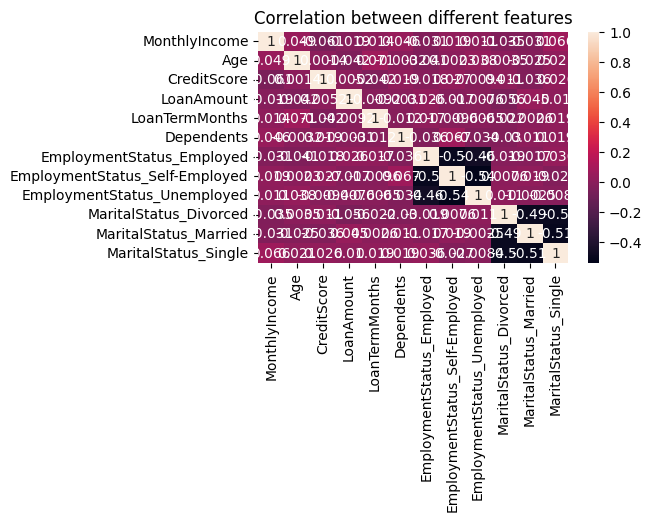

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(X.corr(),annot=True)
plt.title("Correlation between different features")
plt.show()


**TESTING THE DATA**

In [ ]:
print(X_test)

     MonthlyIncome  Age  CreditScore    LoanAmount  LoanTermMonths  \
991    4354.614722   37          340  45107.872537              15   
231    7140.133316   41          619  42220.196472              21   
245    1284.302169   51          541  37512.725845              45   
895    7201.654383   34          571  66119.888574              52   
691    2442.458018   49          680  44205.725770              42   
..             ...  ...          ...           ...             ...   
713    4781.494661   61          806  41064.582106              23   
94     4616.061857   48          554  28059.870685              51   
722    4208.369439   40          695  52183.384674              15   
546    8424.498480   31          597  58287.212844              54   
518    9976.656059   53          825  75614.280228              18   

     Dependents  EmploymentStatus_Employed  EmploymentStatus_Self-Employed  \
991           4                          0                               1   
231

**MAKING PREDICTIONS**

In [ ]:
y_pred = logistic_model.predict(X_val)

**COMPARING ACTUAL AND PREDICTED**

In [ ]:
actual_predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
actual_predicted


,Actual,Predicted
991,0,0
231,1,1
245,1,0
895,0,1
691,1,0
...,...,...
713,0,1
94,0,0
722,0,0
546,1,0


**MODEL EVALUATION**

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Accuracy: 0.47333333333333333
Precision: 0.40350877192982454
Recall: 0.3382352941176471


In [ ]:
# Fit the Logistic Regression model
logistic_model.fit(X_train, y_train)
# Get the coefficients of the features
coefficients = logistic_model.coef_
feature_names = X_train.columns
# Display feature coefficients
for feature, coef in zip(feature_names, coefficients[0]):
 print(f'{feature}: {coef}')


MonthlyIncome: -1.2865587889702337e-05
Age: -0.005948954198288272
CreditScore: 0.0006116597484835865
LoanAmount: 1.4344724893416362e-06
LoanTermMonths: -0.003928220038338318
Dependents: -6.418661741362664e-05
EmploymentStatus_Employed: -7.137060872029143e-05
EmploymentStatus_Self-Employed: -0.0001181991407495376
EmploymentStatus_Unemployed: 0.0001699776292489142
MaritalStatus_Divorced: 0.00018291174885616988
MaritalStatus_Married: -4.996706051660586e-05
MaritalStatus_Single: -0.00015253680856049245


**INTERPRETATION**

MonthlyIncome : The coefficient is negative (-1.286558e-05). This suggests that as the Monthly

Income increases, the likelihood of loan approval slightly decreases, according to this model.
However, the impact is very minimal based on the coefficient's magnitude.

Age : The coefficient is positive (-0.00594e-05), indicating that an increase in Age slightly
increases the probability of loan approval.

CreditScore : This feature has the highest positive coefficient (0.000611), suggesting that a
higher Credit Score significantly increases the probability of loan approval. Credit score
seems to have the most substantial influence on the model's decision.

LoanAmount : The coefficient is negative (1.43447e-06), indicating that as the Loan Amount
increases, the probability of loan approval decreases, though minimally.

LoanTermMonths : Another negative coefficient (-0.00392e-06) suggests that longer Loan
Terms might slightly decrease the likelihood of loan approval.

Dependents : This feature has a negative coefficient (-6.41866e-06), suggesting that having
more dependents might slightly decrease the probability of loan approval.

EmploymentStatus and MaritalStatus dummies : The coefficients for these dummies
(EmploymentStatus and MaritalStatus categories) are relatively small. This indicates that in
the context of this model, these variables have minimal impact on loan approval, almost
negligible.